In [1]:
import pandas as pd
import seaborn as sns
import open3d as o3d
import laspy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
inFile = laspy.file.File('pointcloud.las', mode='r')

In [3]:
inFile.points

array([((626539, 858531,  -466,  447, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 48128, 47616, 44544, 4., -10.26000023,  4.46999979),),
       ((626500, 857813,  -472,  474, 34,   0, 2, 6, -4500, 112, 2.70106747e+08, 49408, 49408, 46336, 8., -10.        ,  4.73999977),),
       ((626633, 858063,  -407,  458, 17,   0, 2, 6, -4500, 112, 2.70106747e+08, 49664, 49664, 46592, 4., -10.13000011,  4.57999992),),
       ...,
       ((626063, 736938,  -973,  822, 17, 192, 1, 7, -4833, 113, 2.70107390e+08, 17408, 19200, 17152, 6.,  -5.76000023,  8.22000027),),
       ((625938, 737156, -1120, 1025, 17,  64, 2, 7, -4833, 113, 2.70107390e+08, 17152, 18432, 16896, 2.,  -3.73000002, 10.25      ),),
       ((625914, 736750, -1097, 1032, 17, 192, 2, 7, -4833, 113, 2.70107390e+08, 15104, 16384, 14848, 9.,  -3.6500001 , 10.31999969),)],
      dtype=[('point', [('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('flag_byte', 'u1'), ('classification_flags', 'u1'), ('classification_byte', 'u1'),

In [4]:
inFile.classification

array([2, 2, 2, ..., 1, 2, 2], dtype=uint8)

In [5]:
classification = inFile.classification

In [6]:
classification.shape

(3402226,)

In [7]:
classification = classification.reshape(-1,1)

In [8]:
classification.shape

(3402226, 1)

In [9]:
classification

array([[2],
       [2],
       [2],
       ...,
       [1],
       [2],
       [2]], dtype=uint8)

In [10]:
inFile.X

array([626539, 626500, 626633, ..., 626063, 625938, 625914])

In [11]:
inFile.Y

array([858531, 857813, 858063, ..., 736938, 737156, 736750])

In [12]:
inFile.Z

array([ -466,  -472,  -407, ...,  -973, -1120, -1097])

In [13]:
points = np.vstack((inFile.X,inFile.Y,inFile.Z)).transpose()

In [14]:
points

array([[626539, 858531,   -466],
       [626500, 857813,   -472],
       [626633, 858063,   -407],
       ...,
       [626063, 736938,   -973],
       [625938, 737156,  -1120],
       [625914, 736750,  -1097]])

In [15]:
points.shape

(3402226, 3)

In [16]:
colors = np.vstack((inFile.Red,inFile.Blue,inFile.Green)).transpose()

In [17]:
colors

array([[48128, 44544, 47616],
       [49408, 46336, 49408],
       [49664, 46592, 49664],
       ...,
       [17408, 17152, 19200],
       [17152, 16896, 18432],
       [15104, 14848, 16384]], dtype=uint16)

In [18]:
colors = colors/65535

In [19]:
colors

array([[0.73438621, 0.67969787, 0.72657359],
       [0.75391775, 0.70704204, 0.75391775],
       [0.75782406, 0.71094835, 0.75782406],
       ...,
       [0.26562905, 0.26172274, 0.29297322],
       [0.26172274, 0.25781643, 0.28125429],
       [0.23047227, 0.22656596, 0.25000381]])

In [20]:
dataset = pd.DataFrame(points,columns=['X','Y','Z'])

In [21]:
dataset

,X,Y,Z
0,626539,858531,-466
1,626500,857813,-472
2,626633,858063,-407
3,626773,858344,-436
4,626500,857219,-407
...,...,...,...
3402221,626117,737469,-910
3402222,625992,737656,-1083
3402223,626063,736938,-973
3402224,625938,737156,-1120


In [22]:
dataset['R'] = colors[:,0]
dataset['G'] = colors[:,1]
dataset['B'] = colors[:,2]
dataset['Classification'] = inFile.classification

In [23]:
dataset

,X,Y,Z,R,G,B,Classification
0,626539,858531,-466,0.734386,0.679698,0.726574,2
1,626500,857813,-472,0.753918,0.707042,0.753918,2
2,626633,858063,-407,0.757824,0.710948,0.757824,2
3,626773,858344,-436,0.738293,0.691417,0.738293,2
4,626500,857219,-407,0.617197,0.574228,0.625010,2
...,...,...,...,...,...,...,...
3402221,626117,737469,-910,0.218753,0.214847,0.246098,1
3402222,625992,737656,-1083,0.265629,0.261723,0.285161,2
3402223,626063,736938,-973,0.265629,0.261723,0.292973,1
3402224,625938,737156,-1120,0.261723,0.257816,0.281254,2


In [24]:
dataset.Classification.unique()

array([ 2,  1,  6,  9, 26], dtype=uint8)

In [25]:
dataset['Classification'] = dataset['Classification'].replace([2,1,6,9,26],[0,1,2,3,4])
dataset.Classification.unique()

array([0, 1, 2, 3, 4], dtype=uint8)

In [26]:
dataset

,X,Y,Z,R,G,B,Classification
0,626539,858531,-466,0.734386,0.679698,0.726574,0
1,626500,857813,-472,0.753918,0.707042,0.753918,0
2,626633,858063,-407,0.757824,0.710948,0.757824,0
3,626773,858344,-436,0.738293,0.691417,0.738293,0
4,626500,857219,-407,0.617197,0.574228,0.625010,0
...,...,...,...,...,...,...,...
3402221,626117,737469,-910,0.218753,0.214847,0.246098,1
3402222,625992,737656,-1083,0.265629,0.261723,0.285161,0
3402223,626063,736938,-973,0.265629,0.261723,0.292973,1
3402224,625938,737156,-1120,0.261723,0.257816,0.281254,0


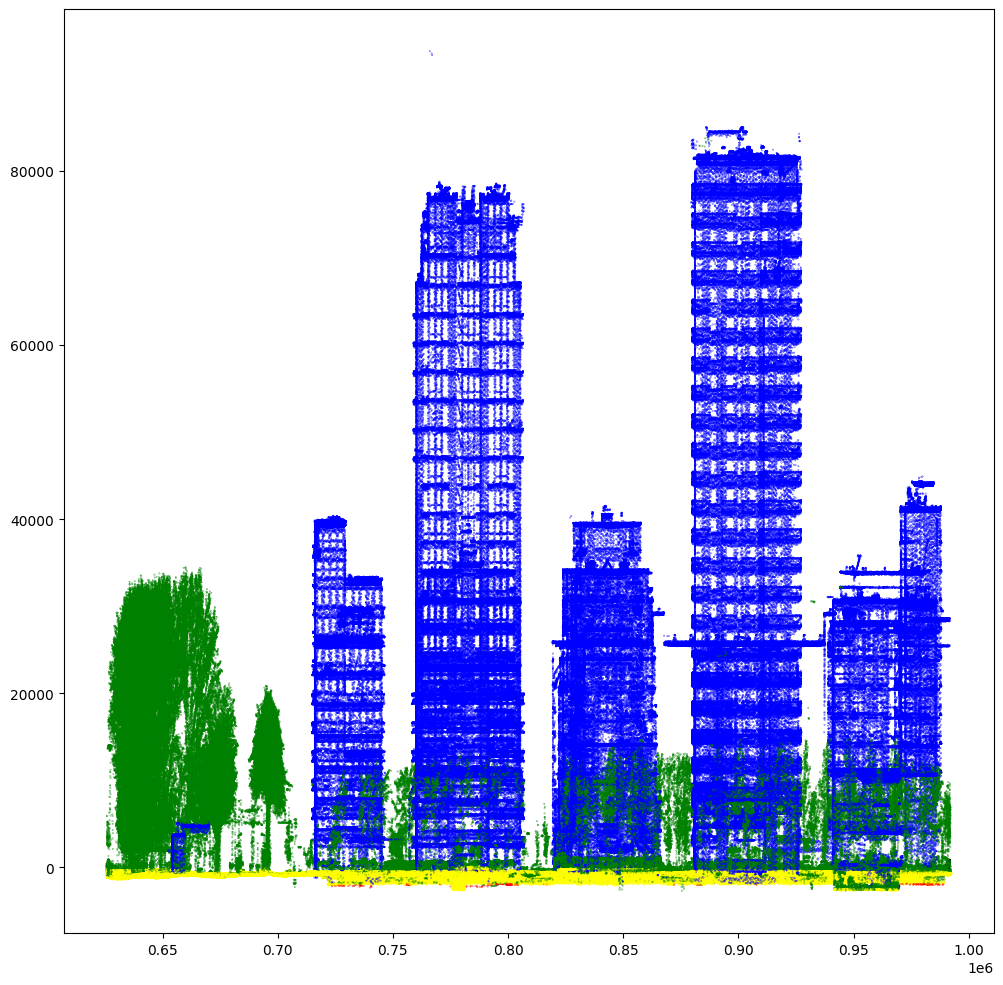

In [27]:
colors = {0:'yellow',1:'green',2:'blue',3:'red',4:'black'}
plt.figure(figsize=(12,12))
plt.scatter(dataset['X'],dataset['Z'],c=dataset['Classification'].map(colors),s=0.05)
plt.show()

In [28]:
colors = np.vstack((inFile.Red,inFile.Blue,inFile.Green)).transpose()
pcd = o3d.geometry.PointCloud()
pcd.colors = o3d.utility.Vector3dVector(colors/65535)
pcd.points = o3d.utility.Vector3dVector(points)


In [29]:
o3d.visualization.draw_geometries([pcd],width=3920,height=2080)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
